In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from pacmap import PaCMAP

plt.rcParams['figure.dpi'] = 400

In [2]:
df = pd.read_csv('../data/raw/data.csv')

df = df[df['year'] == 2020]
df = df.drop('year', axis=1)
df = df.drop('country', axis=1)

nan_cols = df.columns[df.isna().all()]
df = df.drop(nan_cols, axis=1)

df.head()

,EG.CFT.ACCS.ZS,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,EG.ELC.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,NY.ADJ.NNTY.KD.ZG,NY.ADJ.NNTY.KD,NY.ADJ.NNTY.CD,NY.ADJ.NNTY.PC.KD.ZG,...,SG.VAW.REAS.ZS,SG.VAW.ARGU.ZS,SG.VAW.BURN.ZS,SG.VAW.GOES.ZS,SG.VAW.NEGL.ZS,SG.VAW.REFU.ZS,SP.M15.2024.FE.ZS,SP.M18.2024.FE.ZS,SH.DYN.AIDS.FE.ZS,SH.HIV.INCD.YG
54,NaN,NaN,NaN,100.000000,100.000000,100.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,19.501837,7.599289,38.793983,45.609604,30.163364,73.775675,-4.999989,8.114053e+11,7.520792e+11,-7.477902,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.310464,NaN
166,33.200000,15.900000,82.600000,97.699997,97.066711,99.500000,NaN,NaN,1.851511e+10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.100000,500.0
222,14.903839,2.959758,30.873764,52.082053,25.459506,83.165402,5.794022,6.928618e+11,6.455144e+11,3.097360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.542146,NaN
278,50.200000,8.300000,77.600000,46.890610,NaN,73.708916,-26.347738,6.798351e+10,3.690200e+10,-28.716038,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.000000,5600.0


In [3]:
X = df.fillna(0.)
X = StandardScaler().fit_transform(X)

In [4]:
pca = PCA()
X_pca = pca.fit_transform(X)

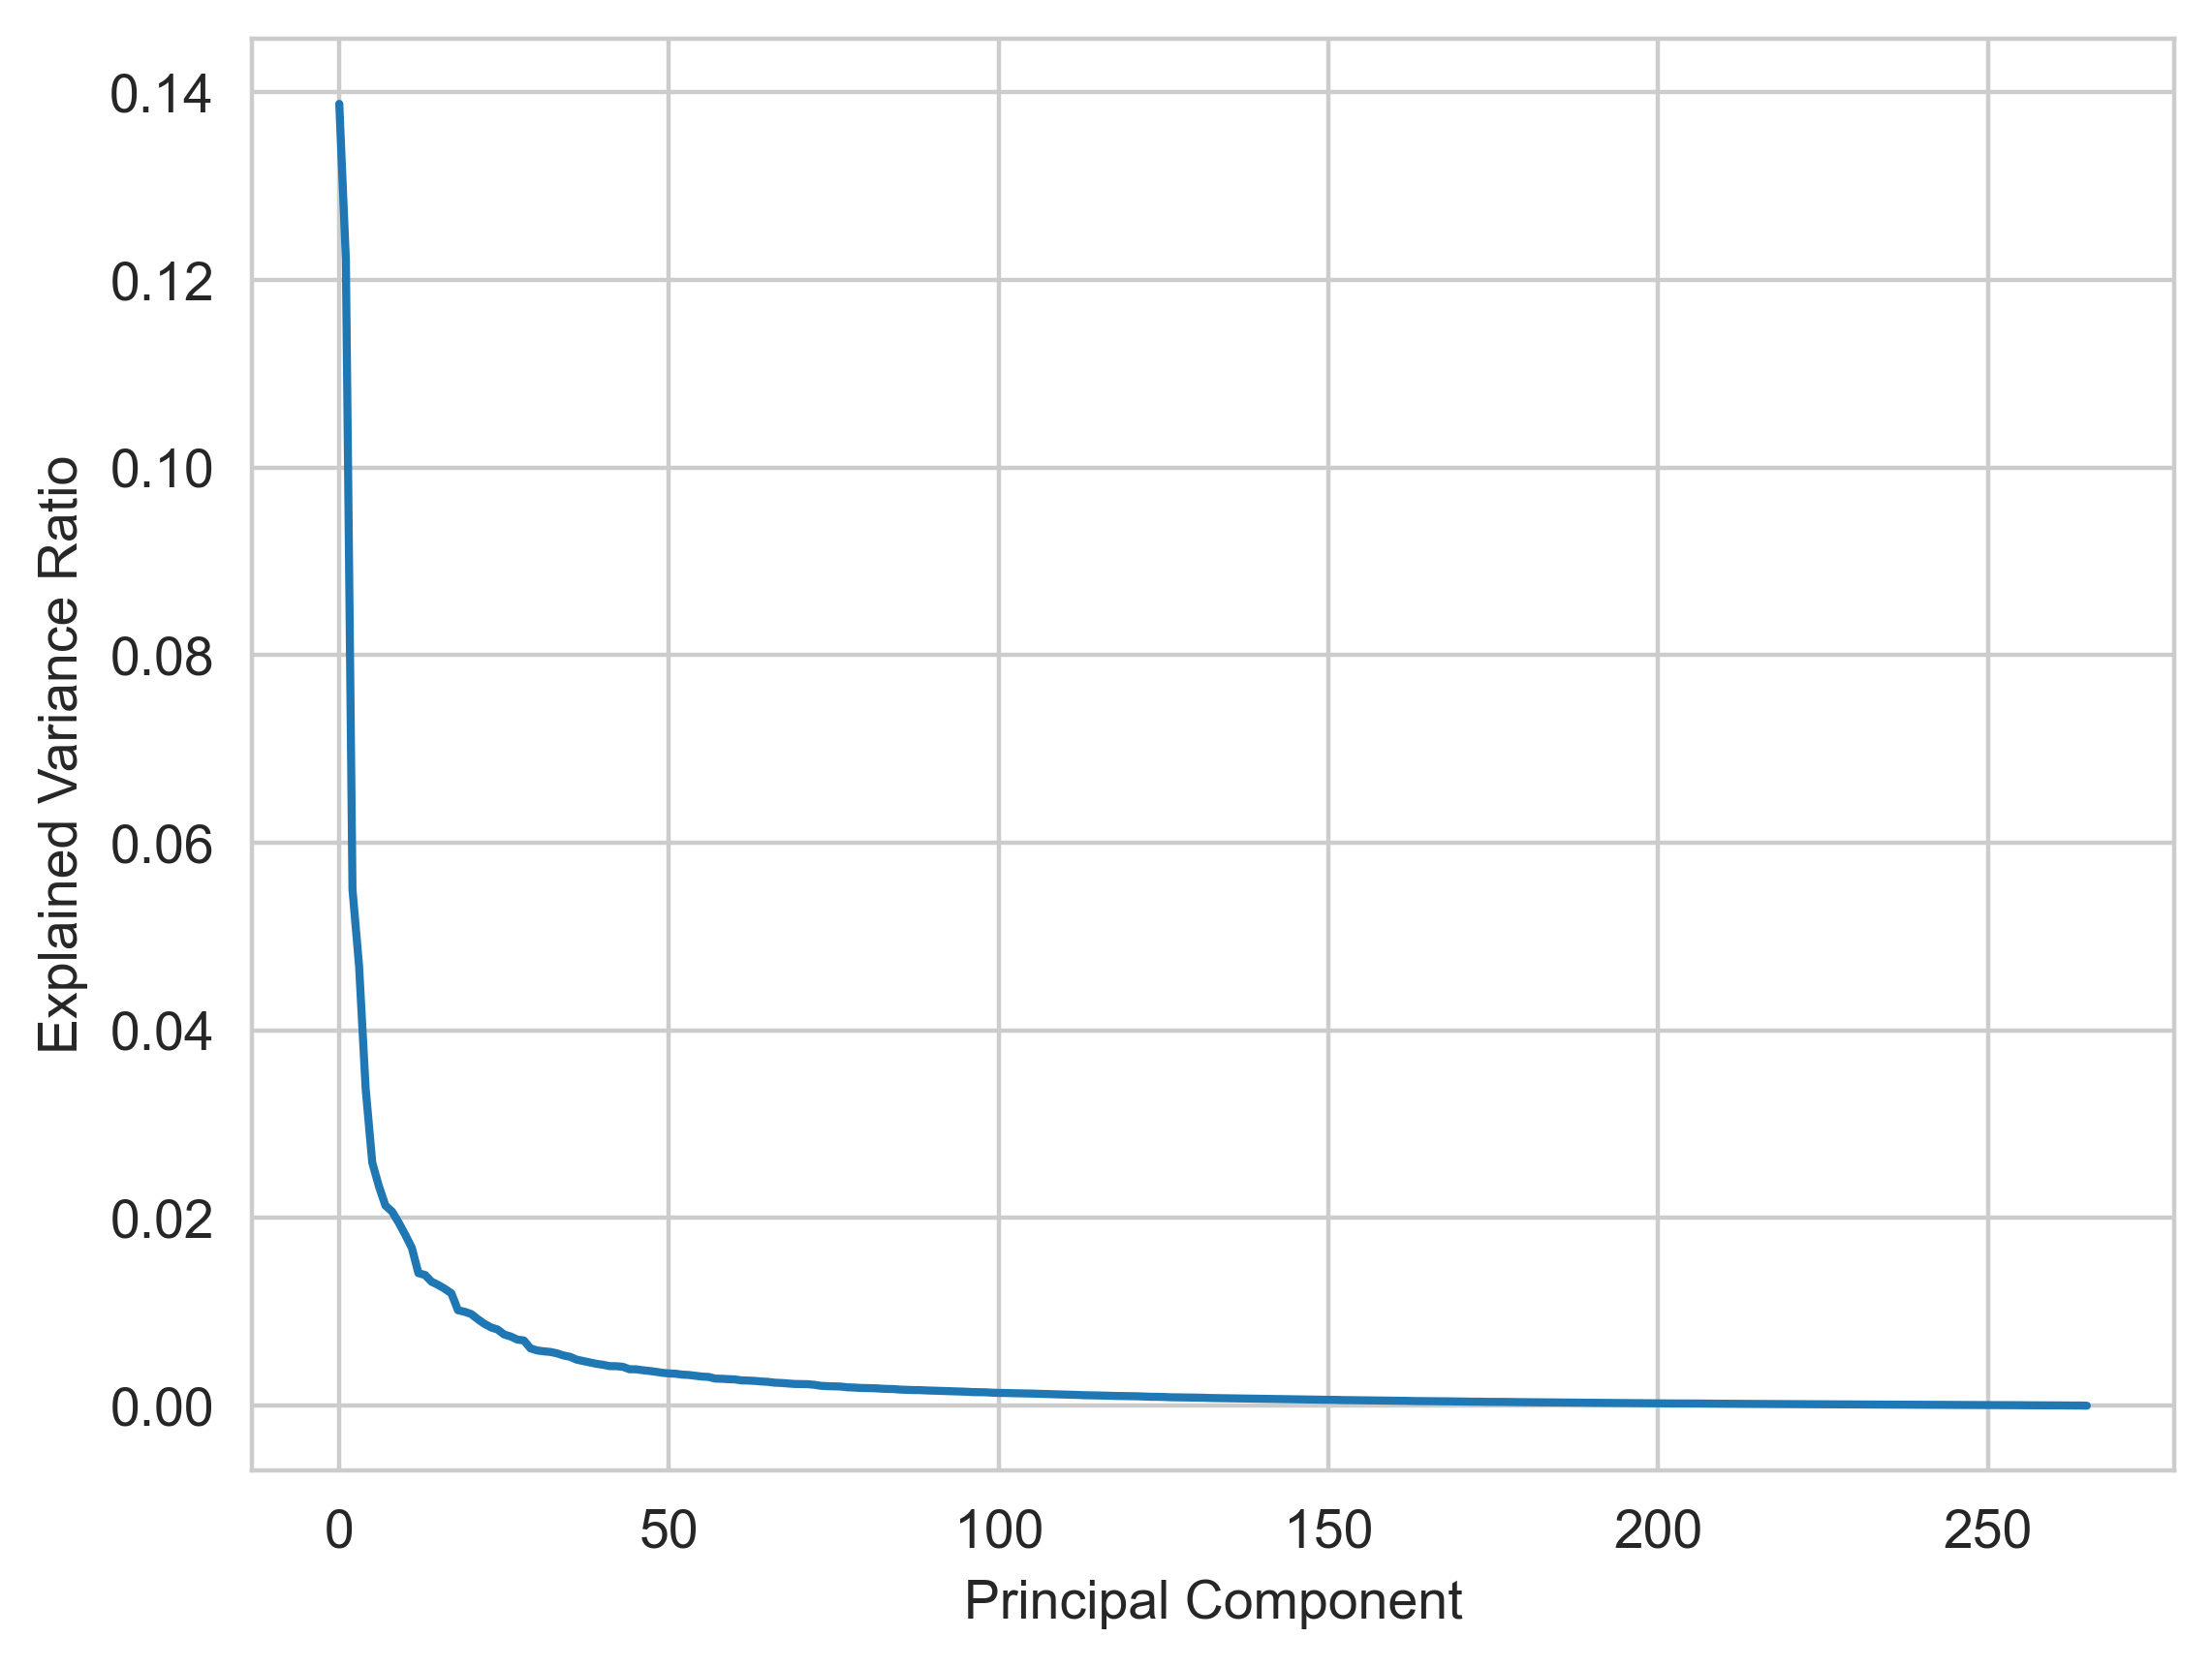

In [5]:
sns.lineplot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.savefig('pca_explained_variance_ratio.png', bbox_inches='tight')
plt.show()

In [6]:
cs = np.cumsum(pca.explained_variance_ratio_)
np.searchsorted(cs, [0.5, 0.8, 0.9, 0.95, 0.99])

array([  9,  46,  85, 123, 193])

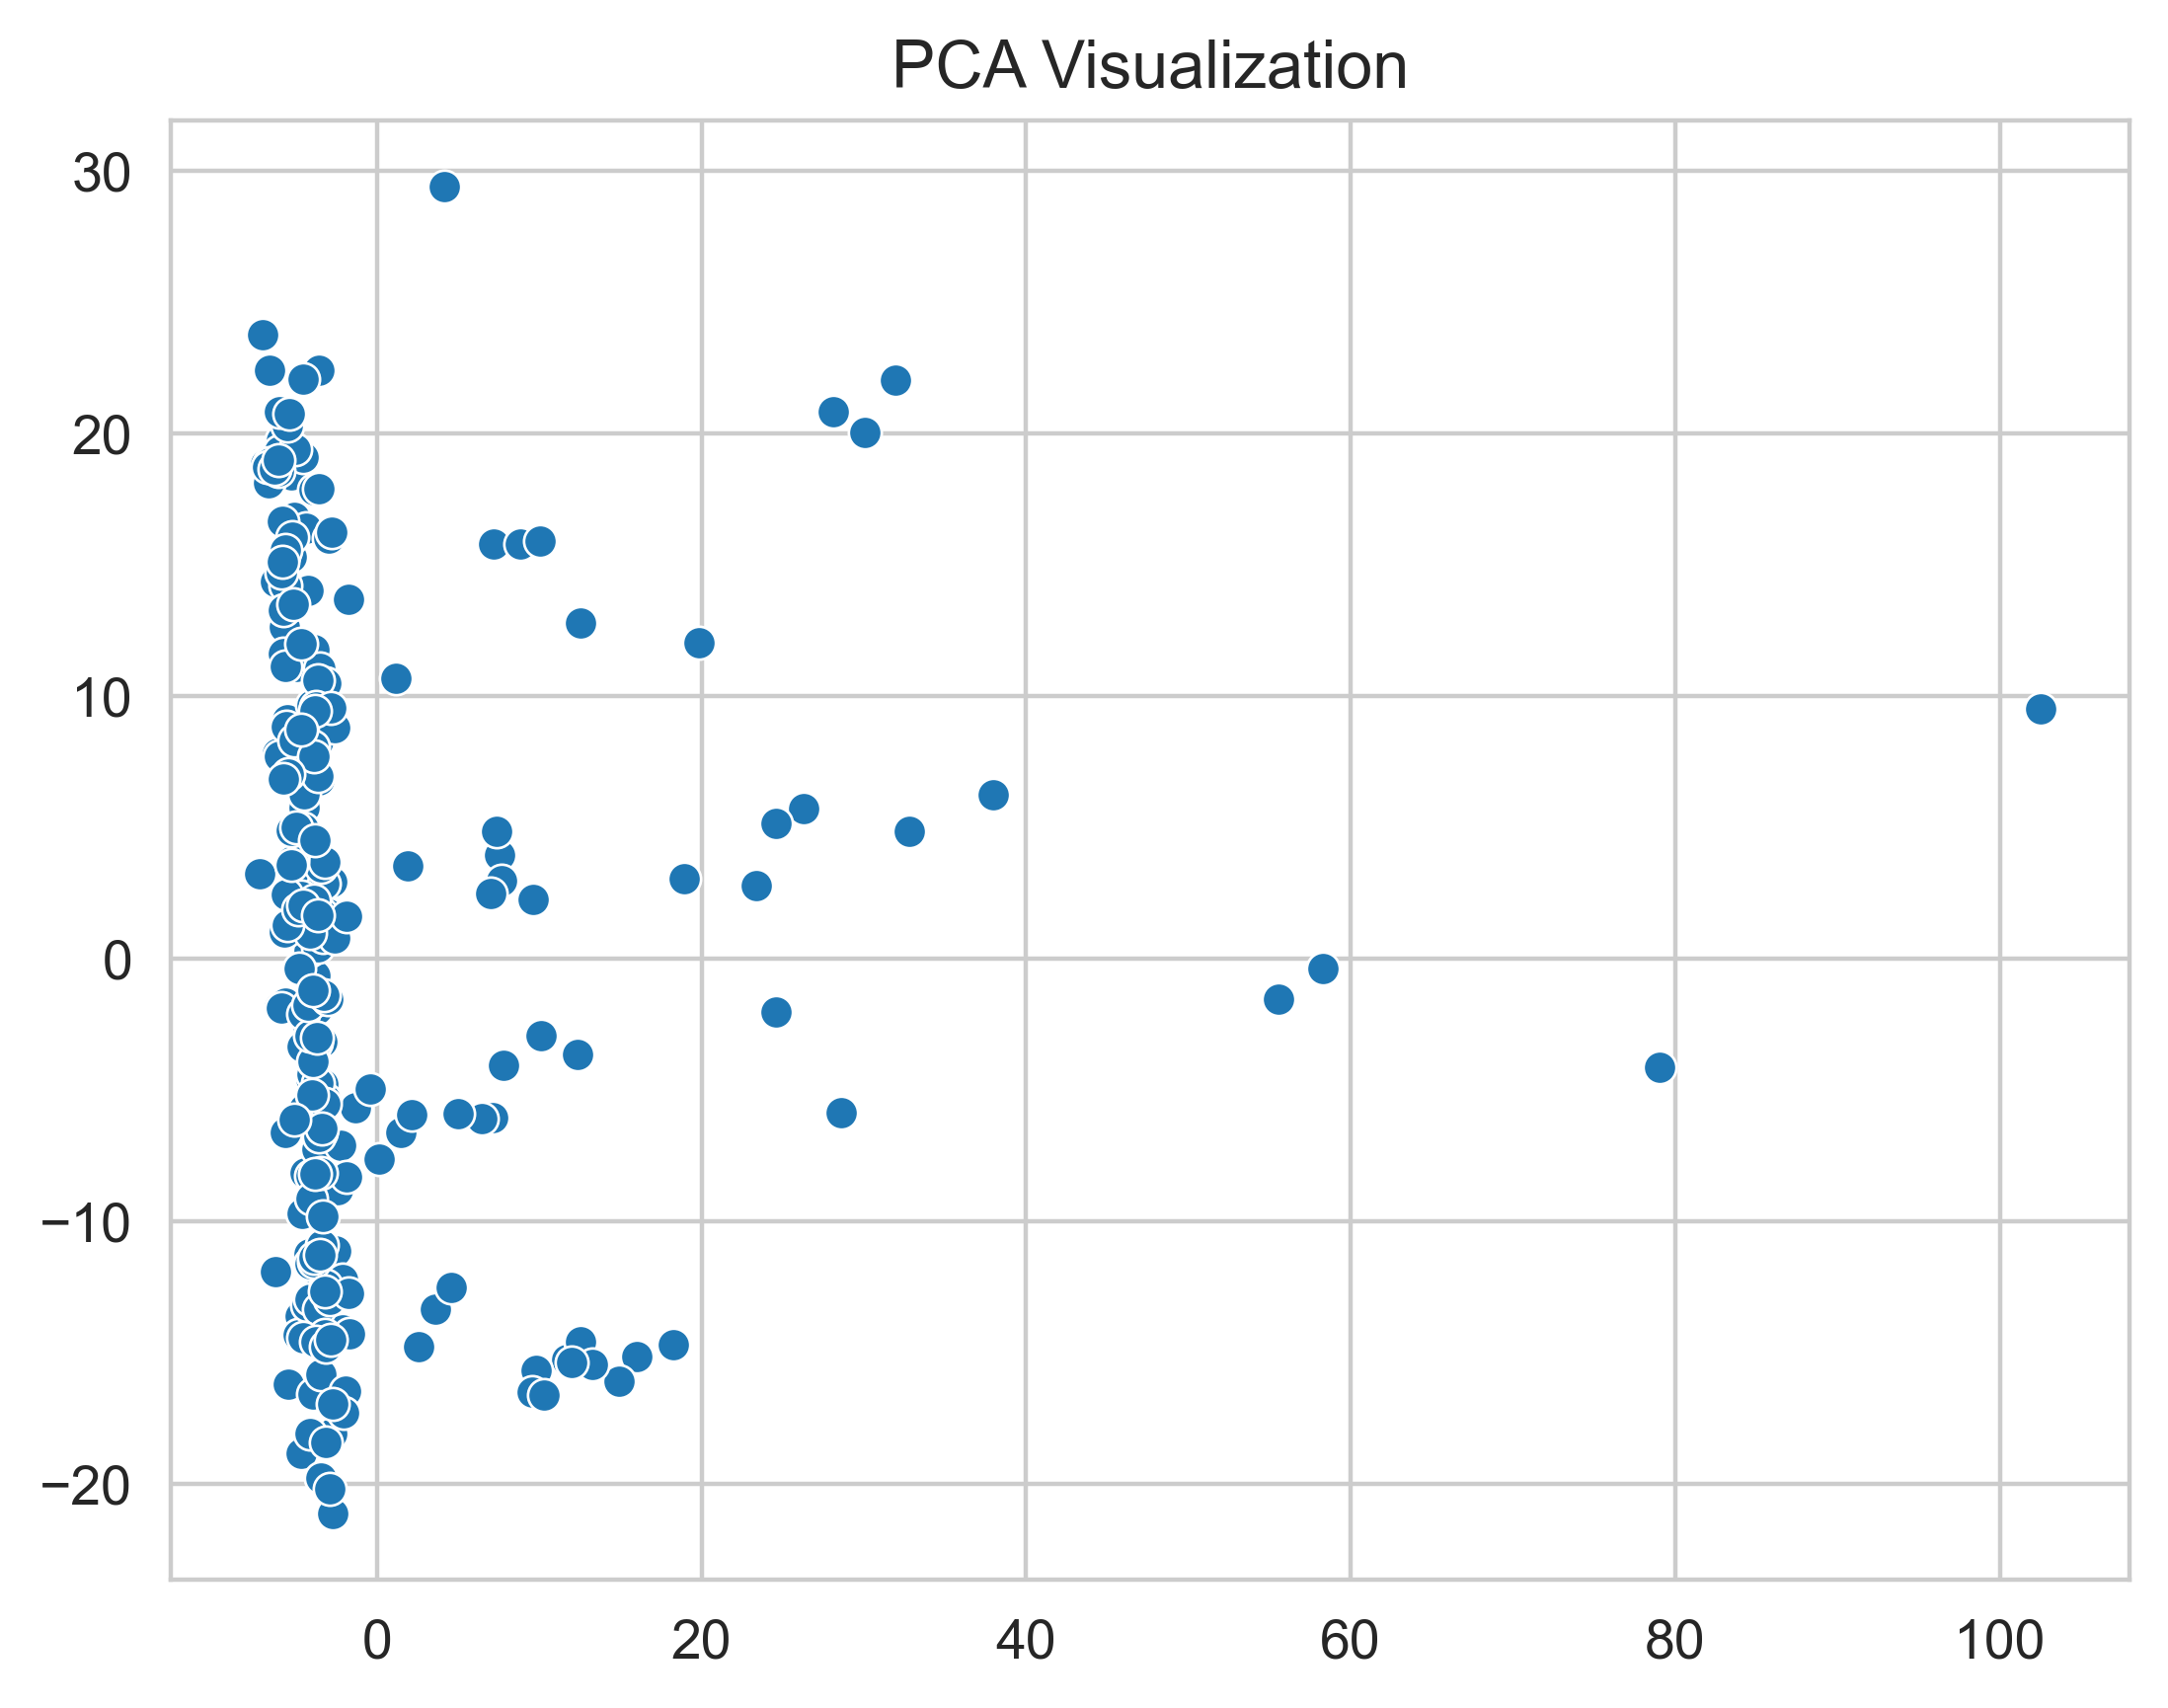

In [7]:
X_pca_vis = PCA(n_components=2).fit_transform(X)
sns.scatterplot(x=X_pca_vis[:, 0], y=X_pca_vis[:, 1])
plt.title('PCA Visualization')
plt.savefig('pca_vis.png', bbox_inches='tight')
plt.show()

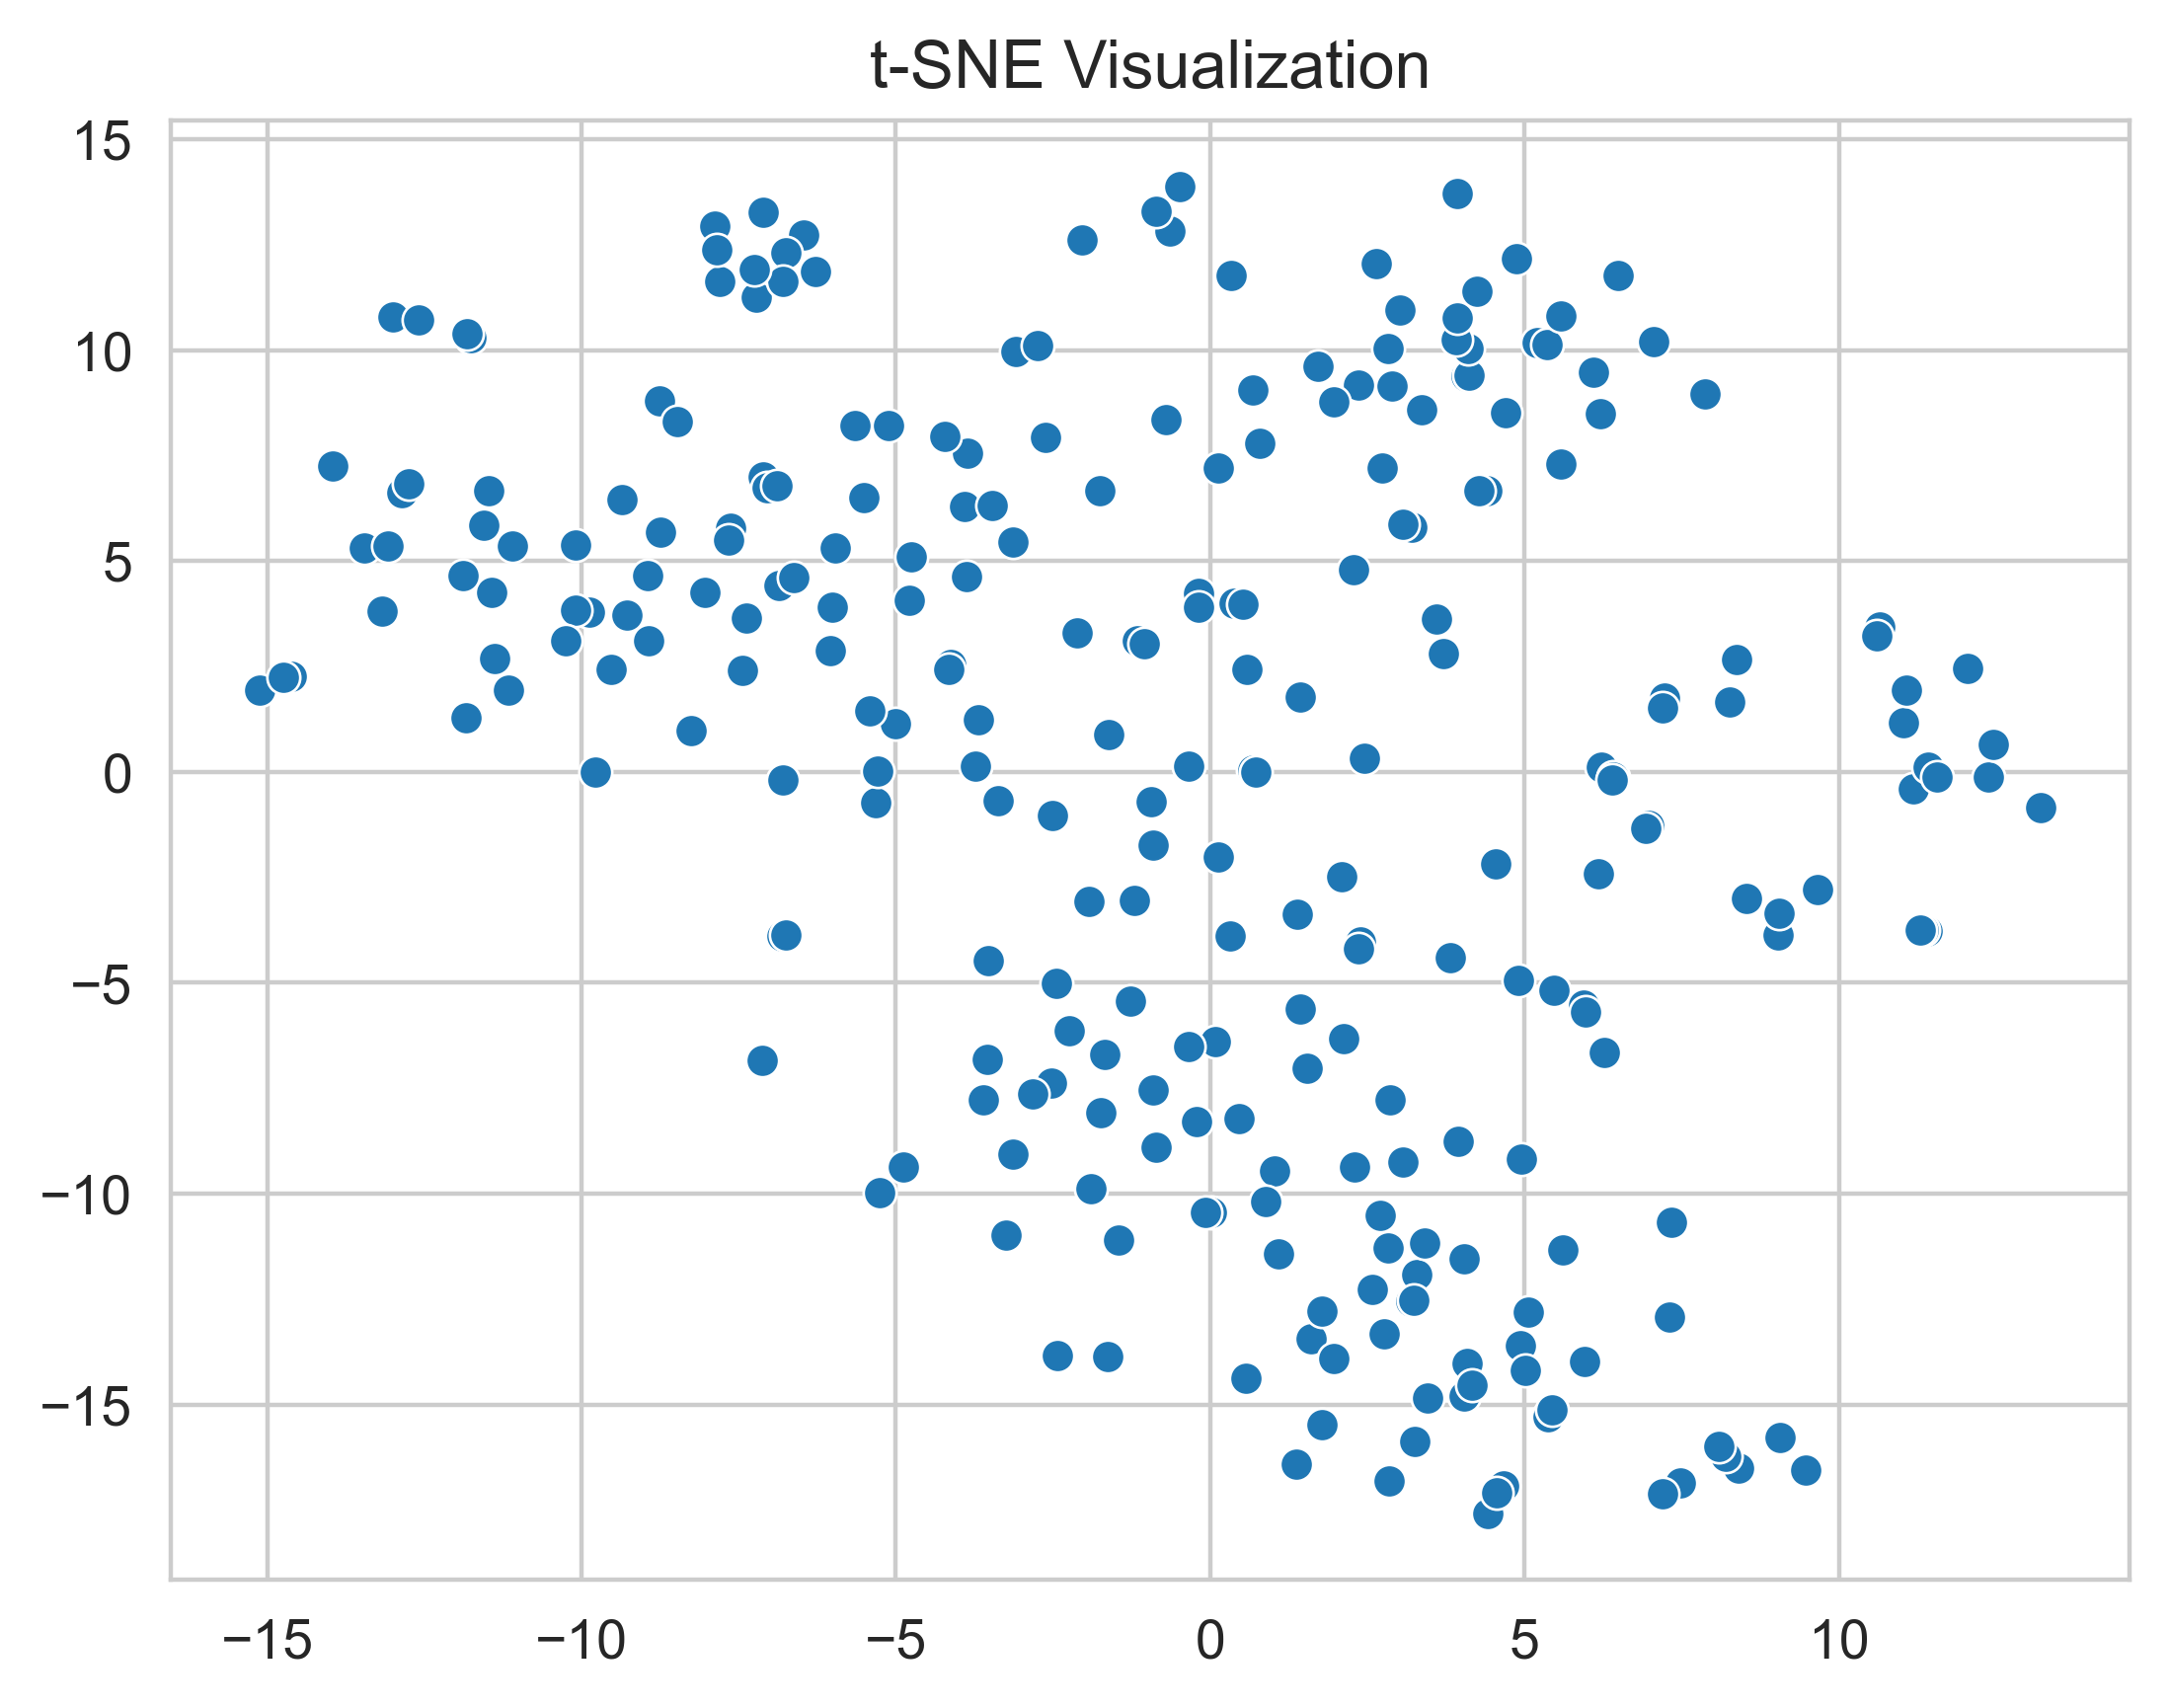

In [8]:
X_tsne_vis = TSNE(n_components=2).fit_transform(X)
sns.scatterplot(x=X_tsne_vis[:, 0], y=X_tsne_vis[:, 1])
plt.title('t-SNE Visualization')
plt.savefig('tsne_vis.png', bbox_inches='tight')
plt.show()

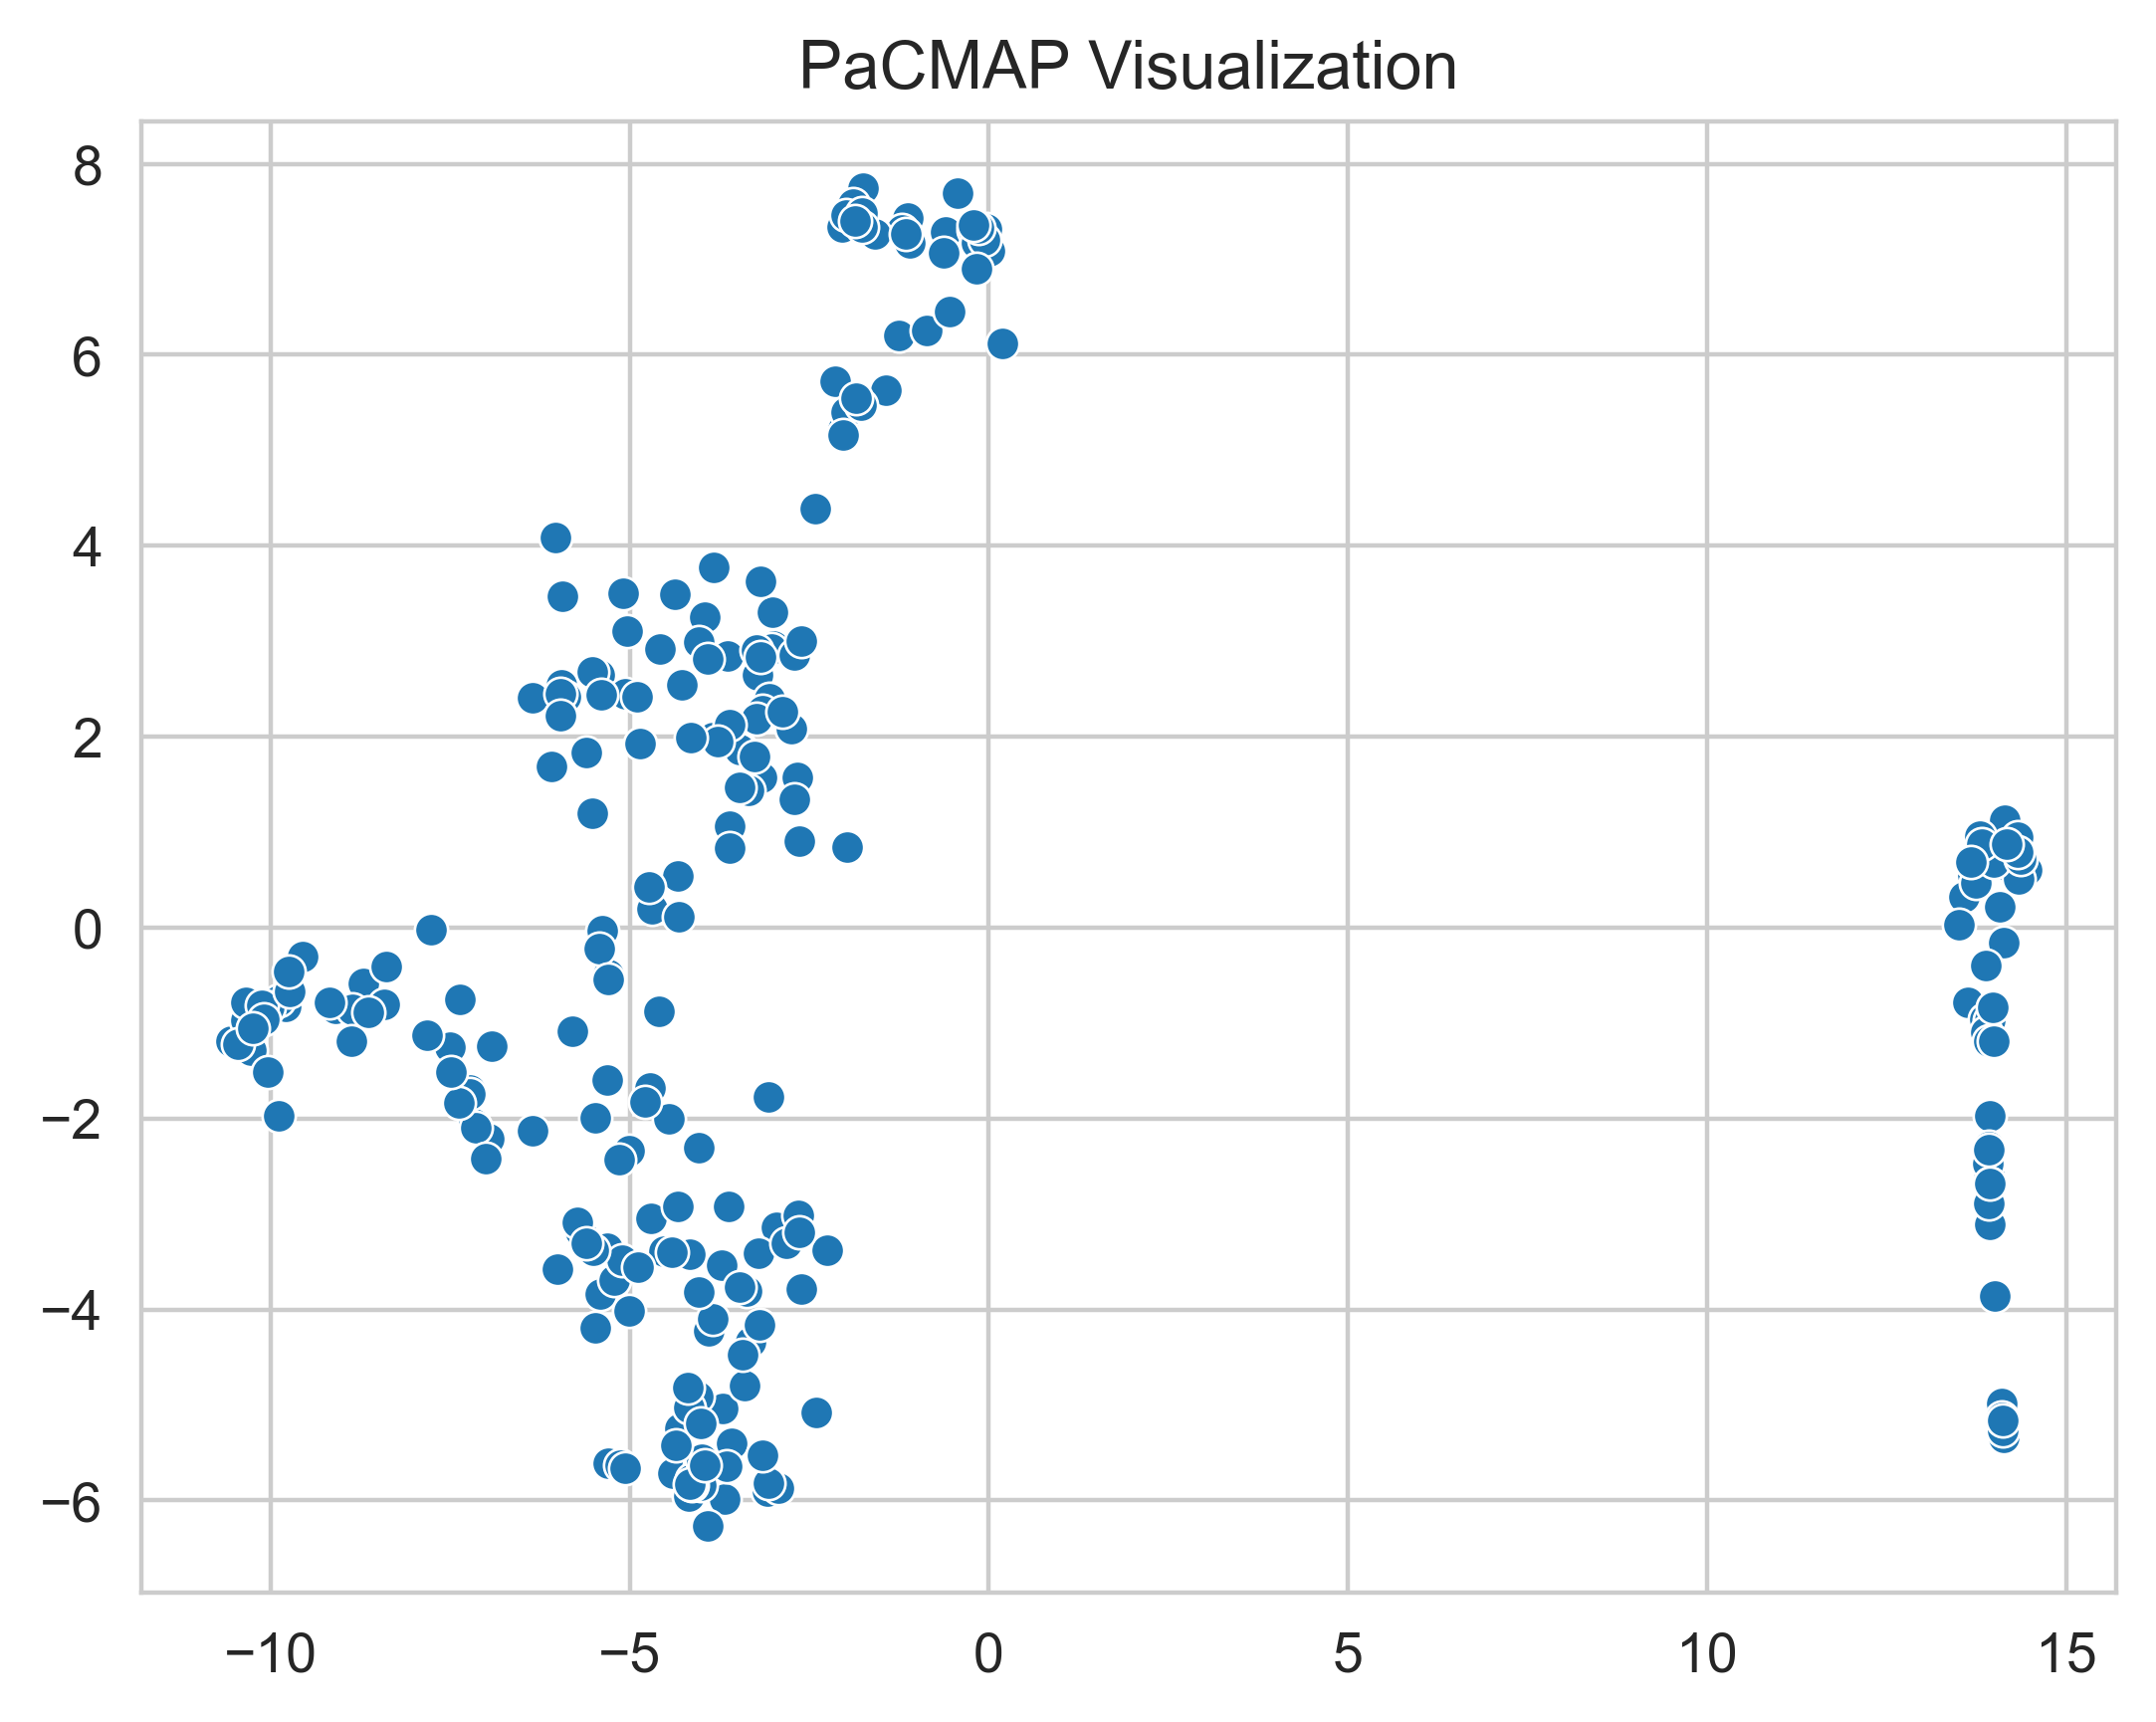

In [9]:
X_pacmap_vis = PaCMAP(n_components=2).fit_transform(X)
sns.scatterplot(x=X_pacmap_vis[:, 0], y=X_pacmap_vis[:, 1])
plt.title('PaCMAP Visualization')
plt.savefig('pacmap_vis.png', bbox_inches='tight')
plt.show()